Fitted parameters:  [9.6339242  0.28288331]
Parameter uncertainties:  [0.00739982 0.00020269]


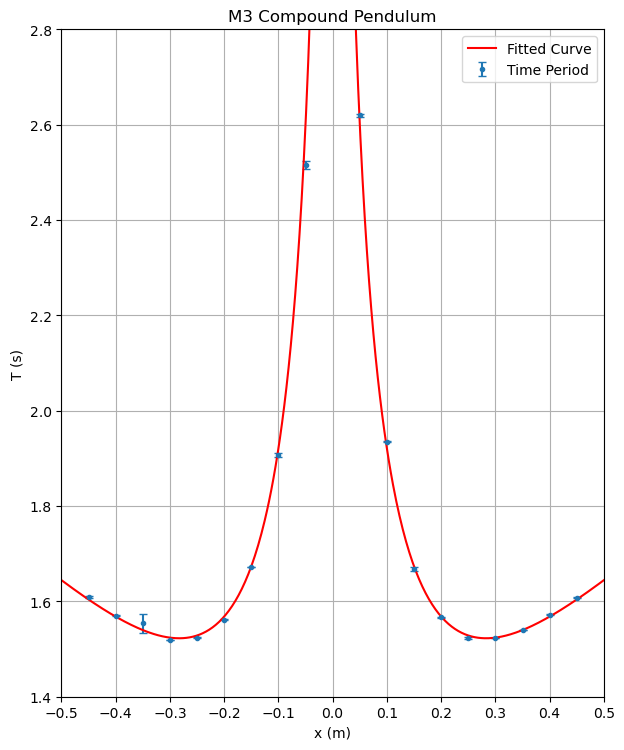

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from io import StringIO

string_data = """
x,T1,T2,T3
-5,75.25,75.35,75.72
-10,57.35,57.21,57.07
-15,50.16,50.19,50.15
-20,46.89,46.85,46.84
-25,45.75,45.74,45.69
-30,45.56,45.59,45.58
-35,46.31,46.25,47.28
-40,47.07,47.10,47.16
-45,48.31,48.22,48.28
45,48.22,48.25,48.22
40,47.13,47.18,47.14
35,46.22,46.21,46.19
30,45.72,45.69,45.71
25,45.78,45.65,45.66
20,47.03,47.00,46.95
15,50.16,49.97,49.91
10,58.00,58.06,58.05
5,78.64,78.67,78.50
"""

# Load data from string table (row 1 is header)
data = np.genfromtxt(StringIO(string_data), delimiter=',', skip_header=2, dtype=np.float64)

# Length (m)
x_data = data[:, 0]/100
# x_data = x_data - np.concatenate((np.zeros(9), np.full(9,0.003))) + np.concatenate((np.full(9,0.003), np.zeros(9)))

# Time Period of Single oscillation (s)
y_raw_data = data[:, 1:]/30

y_data = y_raw_data.mean(axis=1)
y_errors = y_raw_data.std(axis=1, ddof=1)

#print(data)
#print(y_data)
#print(y_errors)

def model(x, g, k):
    return 2 * np.pi * np.sqrt((k**2 + x**2)/(np.abs(x) * g))

popt, pcov = curve_fit(model, x_data, y_data, sigma=y_errors, absolute_sigma=True)

print("Fitted parameters: ", popt)
print("Parameter uncertainties: ", np.sqrt(np.diag(pcov)))

plt.figure(figsize=(7,7*(26/21)))

plt.errorbar(x_data, y_data, yerr=y_errors, fmt='.', label="Time Period", capsize=3)

x_fine = np.linspace(-0.50, 0.50, 500)
plt.plot(x_fine, model(x_fine, *popt), 'r-', label="Fitted Curve")
plt.xlim(-0.50, 0.50)
plt.ylim(1.4, 2.8)
plt.xticks(np.linspace(-0.50, 0.50, 11))

plt.title('M3 Compound Pendulum')
plt.xlabel('x (m)')
plt.ylabel('T (s)')
plt.legend()
plt.grid()
plt.show()